# 主題：使用 BERT 模型進行電影評論文章情緒分析
## Task 1: 情緒分析文章處理
- 提示: 最大不可超過BERT限制512

In [1]:
from tqdm import tqdm
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import json
beer_list = []
with open('train_set.json', newline='') as jsonfile:
    data = json.loads(jsonfile.read())
    beer_list.append(data)

In [3]:
len(beer_list[0])

45000

In [4]:
beer = pd.DataFrame(columns = list(beer_list[0][0].keys()))

for i in tqdm(range(len(beer_list[0]))):
    beer.loc[i,:] = list(beer_list[0][i].values())

100%|██████████| 45000/45000 [17:57<00:00, 41.75it/s] 


In [5]:
beer

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,...,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName,review_appearance,review_aroma,review_overall,review_palate,review_taste,text_length
0,40163,5,46634,14338,Chiostro,Herbed / Spiced Beer,4,4,4,4,...,None,None,None,RblWthACoz,2,2,2,2,2,94
1,8135,11,3003,395,Bearded Pat's Barleywine,American Barleywine,4,3.5,3.5,3.5,...,None,None,None,BeerSox,2,1,1,1,1,99
2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4,3.5,3.5,...,None,None,Male,mschofield,1,2,1,1,1,63
3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3,3,2.5,3,...,"Aug 10, 1976",2.08508e+08,Male,molegar76,1,1,1,1,1,67
4,37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4,3,3,3.5,...,None,None,None,Brewbro000,2,1,1,1,1,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,7018,9.9,4374,1386,Rajah's Royal IPA,American Double / Imperial IPA,None,None,None,None,...,None,None,None,cjbeatty130,3,3,3,3,3,259
44996,47423,5,25382,394,Oktober Fest,MÃ¤rzen / Oktoberfest,None,None,None,None,...,None,None,None,ColForbinBC,3,3,3,3,3,70
44997,29059,12,55900,1199,Founders Nemesis 2009,Wheatwine,None,None,None,None,...,None,None,None,JayQue,3,3,3,3,3,194
44998,5958,4.75,12421,936,Amber Ale,American Amber / Red Ale,None,None,None,None,...,None,None,None,RJLarse,3,3,3,3,3,170


### Plot  review

D:\Users\ntuhuser\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'appearance score')

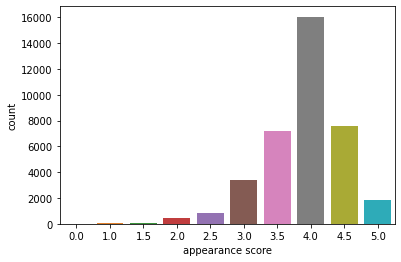

In [6]:
# review/appearance
sns.countplot(beer["review/appearance"], order = sorted(beer['review/appearance'].value_counts().index))
plt.xlabel('appearance score')

D:\Users\ntuhuser\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'aroma score')

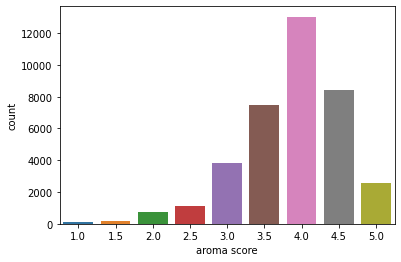

In [7]:
sns.countplot(beer["review/aroma"], order = sorted(beer['review/aroma'].value_counts().index))
plt.xlabel('aroma score')

D:\Users\ntuhuser\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'overall score')

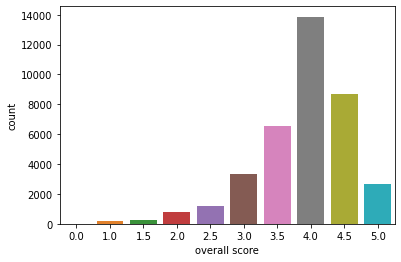

In [8]:
sns.countplot(beer["review/overall"], order = sorted(beer['review/overall'].value_counts().index))
plt.xlabel('overall score')

D:\Users\ntuhuser\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'palate score')

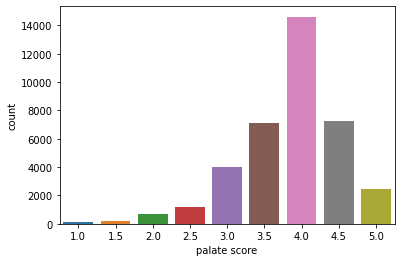

In [9]:
sns.countplot(beer["review/palate"], order = sorted(beer['review/palate'].value_counts().index))
plt.xlabel('palate score')

D:\Users\ntuhuser\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'taste score')

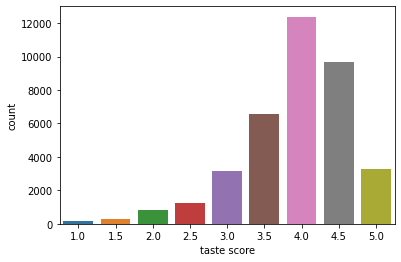

In [10]:
sns.countplot(beer["review/taste"], order = sorted(beer['review/taste'].value_counts().index))
plt.xlabel('taste score')

### Plot review after rescale
Rescale 程式碼：
``` python
if score <= 3.5:
    return 1
if score == 4:
    return 2
return 3
```

D:\Users\ntuhuser\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'review_appearance score')

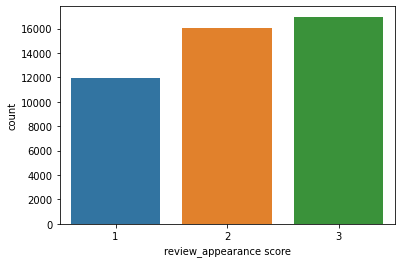

In [11]:
sns.countplot(beer["review_appearance"], order = sorted(beer['review_appearance'].value_counts().index))
plt.xlabel('review_appearance score')

D:\Users\ntuhuser\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'review_aroma score')

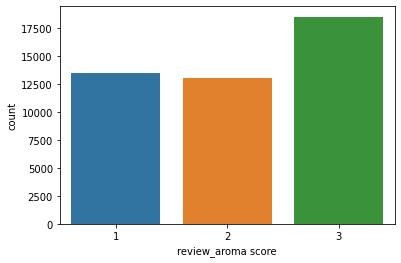

In [12]:
sns.countplot(beer["review_aroma"], order = sorted(beer['review_aroma'].value_counts().index))
plt.xlabel('review_aroma score')

D:\Users\ntuhuser\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'review_overall score')

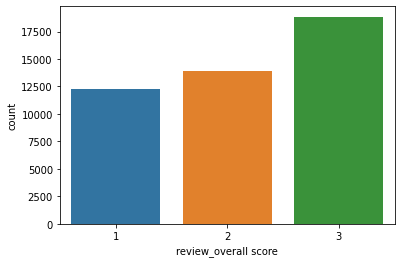

In [13]:
sns.countplot(beer["review_overall"], order = sorted(beer['review_overall'].value_counts().index))
plt.xlabel('review_overall score')

D:\Users\ntuhuser\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'review_palate score')

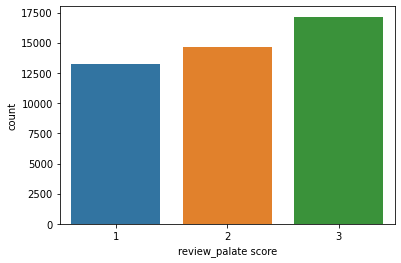

In [14]:
sns.countplot(beer["review_palate"], order = sorted(beer['review_palate'].value_counts().index))
plt.xlabel('review_palate score')

D:\Users\ntuhuser\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'review_taste score')

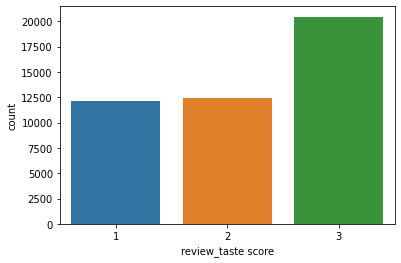

In [15]:
sns.countplot(beer["review_taste"], order = sorted(beer['review_taste'].value_counts().index))
plt.xlabel('review_taste score')

### 決定合適的BERT最大長度

In [16]:
beer['text_length'].astype(int).describe()

count    45000.000000
mean       125.539778
std         69.279549
min          1.000000
25%         78.000000
50%        109.000000
75%        153.000000
max        886.000000
Name: text_length, dtype: float64

In [17]:
beer['text_length'].astype(int).describe([0.8, 0.9, 0.95])

count    45000.000000
mean       125.539778
std         69.279549
min          1.000000
50%        109.000000
80%        167.000000
90%        211.000000
95%        256.000000
max        886.000000
Name: text_length, dtype: float64

95%的語句都分布在256個單數之內，因此決定將之後的BERT max sequence length設定為256個字。

In [18]:
# 80% training dataset / 20% test dataset
train_size = int(len(beer) * 0.8)
train_data = beer.iloc[:train_size]
test_data = beer.iloc[train_size:].reset_index(drop=True)

## Task 2: BERT文章Tokenize基礎
- 提示: 不要忘記加上[SEP]與[CLS]

## Task 3: BERT分類型情緒分析


## Task 4: BERT分類型情緒分析(優化與調教)


## Task 5: BERT回歸型情緒分析